<a href="https://colab.research.google.com/github/fighaz/PCVK_2024/blob/main/Week6PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week6.ipynb”.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io
import math
import os
import glob

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)

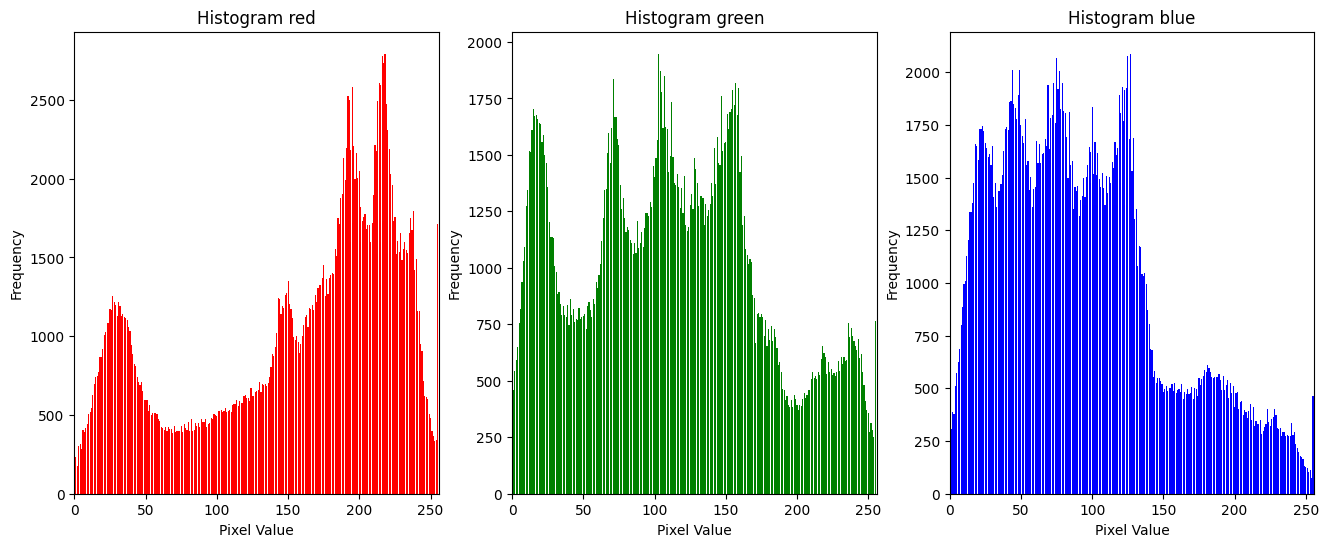

In [ ]:
from collections import Counter
from math import floor
image = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Inisialisasi histogram untuk setiap channel (R, G, B)
channel = ["red","green","blue"]
hist_r = np.zeros(256)
hist_g = np.zeros(256)
hist_b = np.zeros(256)

# Hitung frekuensi setiap nilai piksel untuk masing-masing channel
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        value_r, value_g, value_b = image[i, j]
        hist_r[value_r] += 1
        hist_g[value_g] += 1
        hist_b[value_b] += 1

def show_histogram(hist,color,col):
    plt.subplot(1, 3, col)
    plt.bar(range(256), hist, color=color, label=color)
    plt.title(f"Histogram {color}")
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim(0, 256)

plt.figure(figsize=(16, 6))
show_histogram(hist_r,channel[0],1)
show_histogram(hist_g,channel[1],2)
show_histogram(hist_b,channel[2],3)
plt.show()



4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “ histogram”. Bandingkan
hasilnya. Apakah output muncul sama?

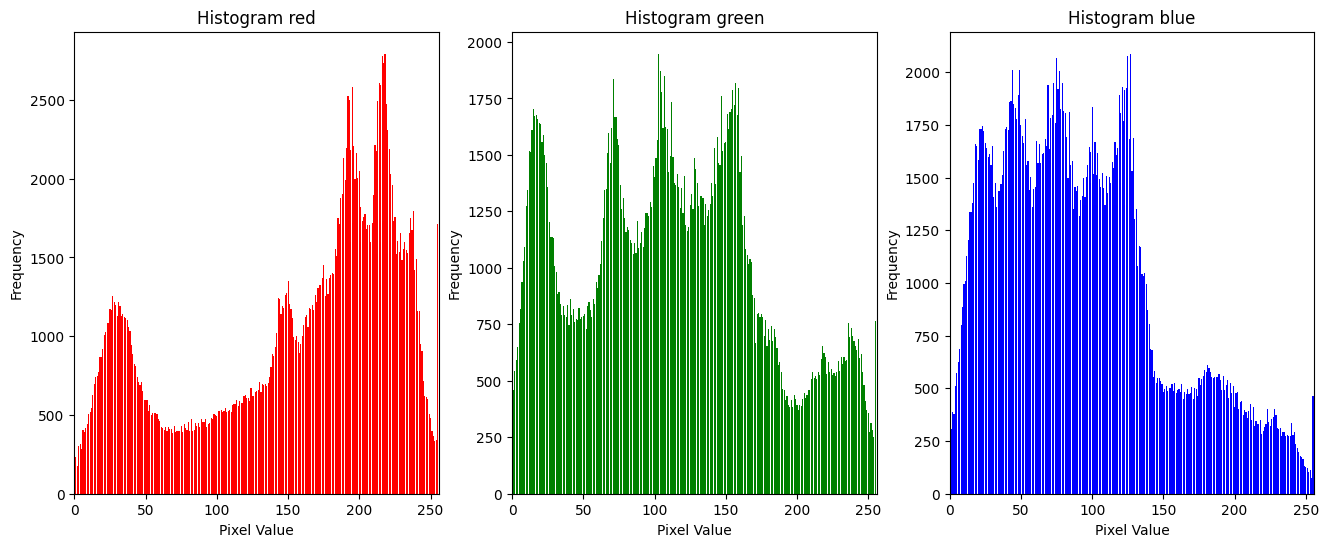

In [ ]:
image2 = image.copy()
image_np = np.array(image2)

# Pisah RGB
red_channel = image_np[:, :, 0]
green_channel = image_np[:, :, 1]
blue_channel = image_np[:, :, 2]

# Menghitung histogram
red_hist, red_bins = np.histogram(red_channel, bins=256, range=(0, 256))
green_hist, green_bins = np.histogram(green_channel, bins=256, range=(0, 256))
blue_hist, blue_bins = np.histogram(blue_channel, bins=256, range=(0, 256))

# Plot histogram
plt.figure(figsize=(16, 6))

show_histogram(red_hist,channel[0],1)
show_histogram(green_hist,channel[1],2)
show_histogram(blue_hist,channel[2],3)
plt.show()


Output dari kedua cara menampilkan hasil yang sama

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

In [ ]:
# https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html
def histogram_equalization(channel):
    # Hitung histogram
    hist, bins = np.histogram(channel.flatten(), bins=256, range=(0, 256))

    # Hitung CDF (Cumulative Distribution Function)
    cdf = hist.cumsum()
    cdf_normalized = cdf * (255 / cdf[-1])  # Normalisasi CDF

    # Terapkan equalization pada channel
    equalized_channel = np.interp(channel.flatten(), bins[:-1], cdf_normalized).reshape(channel.shape)

    return equalized_channel.astype(np.uint8)

# Membaca gambar
image3 = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg')
image3= cv.cvtColor(image3, cv.COLOR_BGR2RGB)

image_np = np.array(image3)

# Pisahkan kanal RGB
red_channel = image_np[:, :, 0]
green_channel = image_np[:, :, 1]
blue_channel = image_np[:, :, 2]

# Equalize setiap kanal
red_eq = histogram_equalization(red_channel)
green_eq = histogram_equalization(green_channel)
blue_eq = histogram_equalization(blue_channel)

# Gabungkan kembali kanal yang telah di-equalize
equalized_image = np.stack((red_eq, green_eq, blue_eq), axis=2)


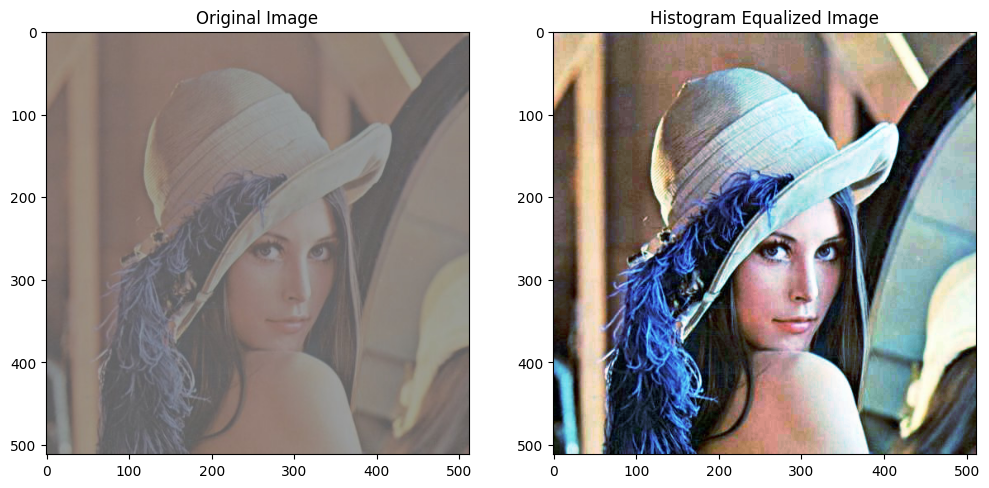

<Figure size 1600x600 with 0 Axes>

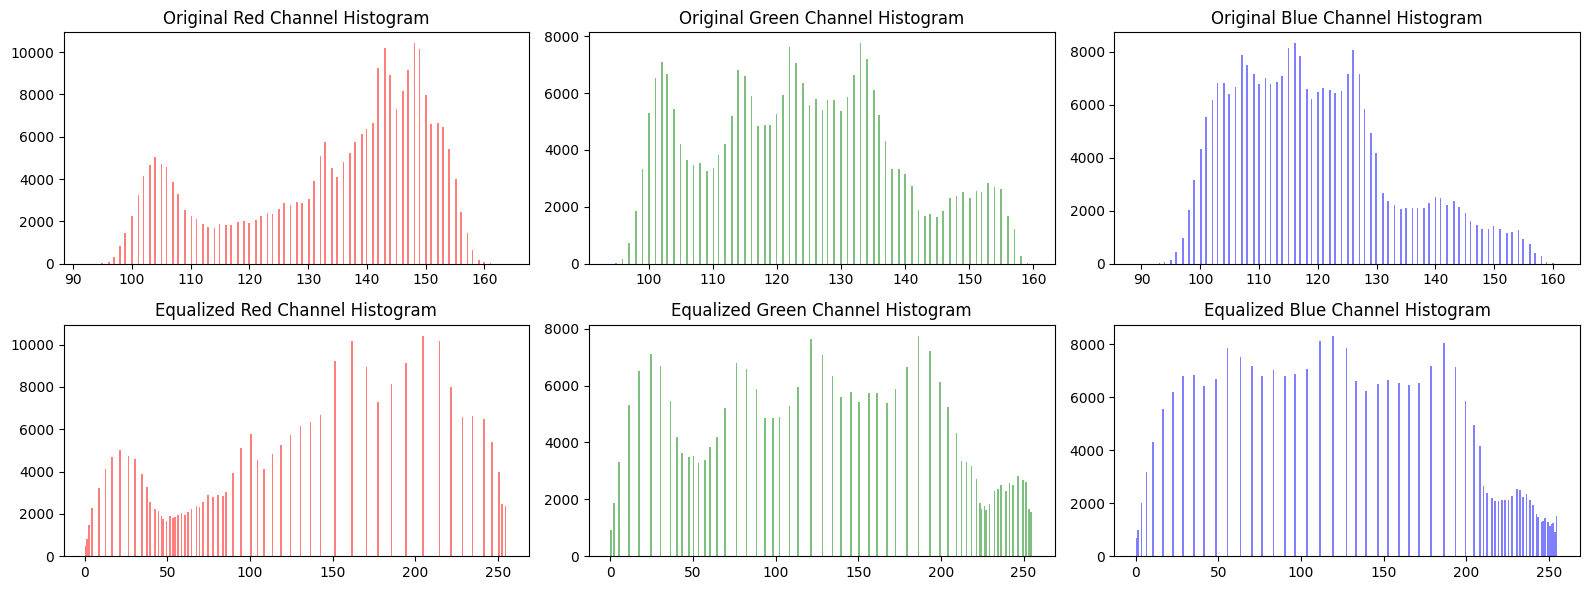

In [ ]:
# Tampilkan gambar asli dan yang sudah di-equalize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Histogram Equalized Image')

plt.show()

plt.figure(figsize=(16, 6))

fig, axs = plt.subplots(2, 3, figsize=(16, 6))

# Gambar asli
axs[0, 0].hist(red_channel.flatten(), bins=256, color='red', alpha=0.5)
axs[0, 0].set_title('Original Red Channel Histogram')

axs[0, 1].hist(green_channel.flatten(), bins=256, color='green', alpha=0.5)
axs[0, 1].set_title('Original Green Channel Histogram')

axs[0, 2].hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.5)
axs[0, 2].set_title('Original Blue Channel Histogram')

# Gambar yang telah di-equalize
axs[1, 0].hist(red_eq.flatten(), bins=256, color='red',range=(0,256), alpha=0.5)
axs[1, 0].set_title('Equalized Red Channel Histogram')

axs[1, 1].hist(green_eq.flatten(), bins=256,range=(0,256), color='green', alpha=0.5)
axs[1, 1].set_title('Equalized Green Channel Histogram')

axs[1, 2].hist(blue_eq.flatten(), bins=256,range=(0,256), color='blue', alpha=0.5)
axs[1, 2].set_title('Equalized Blue Channel Histogram')

plt.tight_layout()



6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “ equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

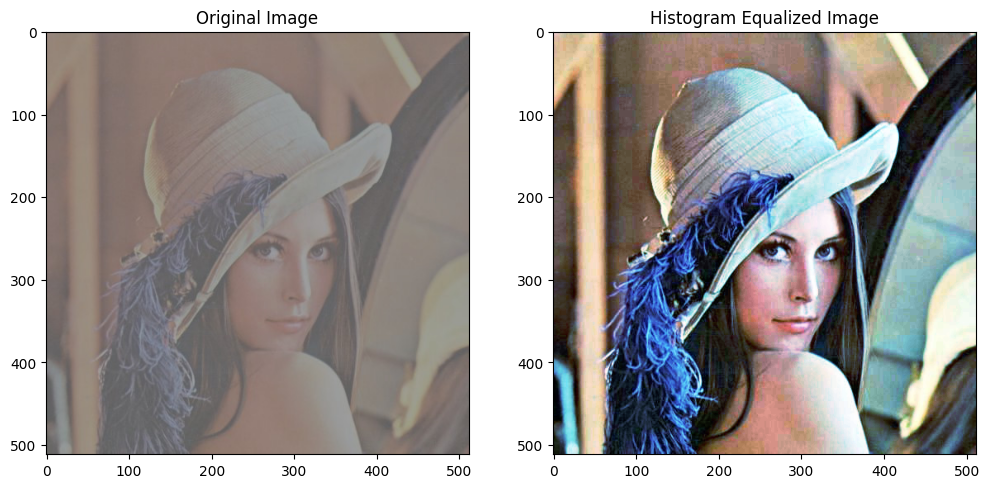

<Figure size 1600x600 with 0 Axes>

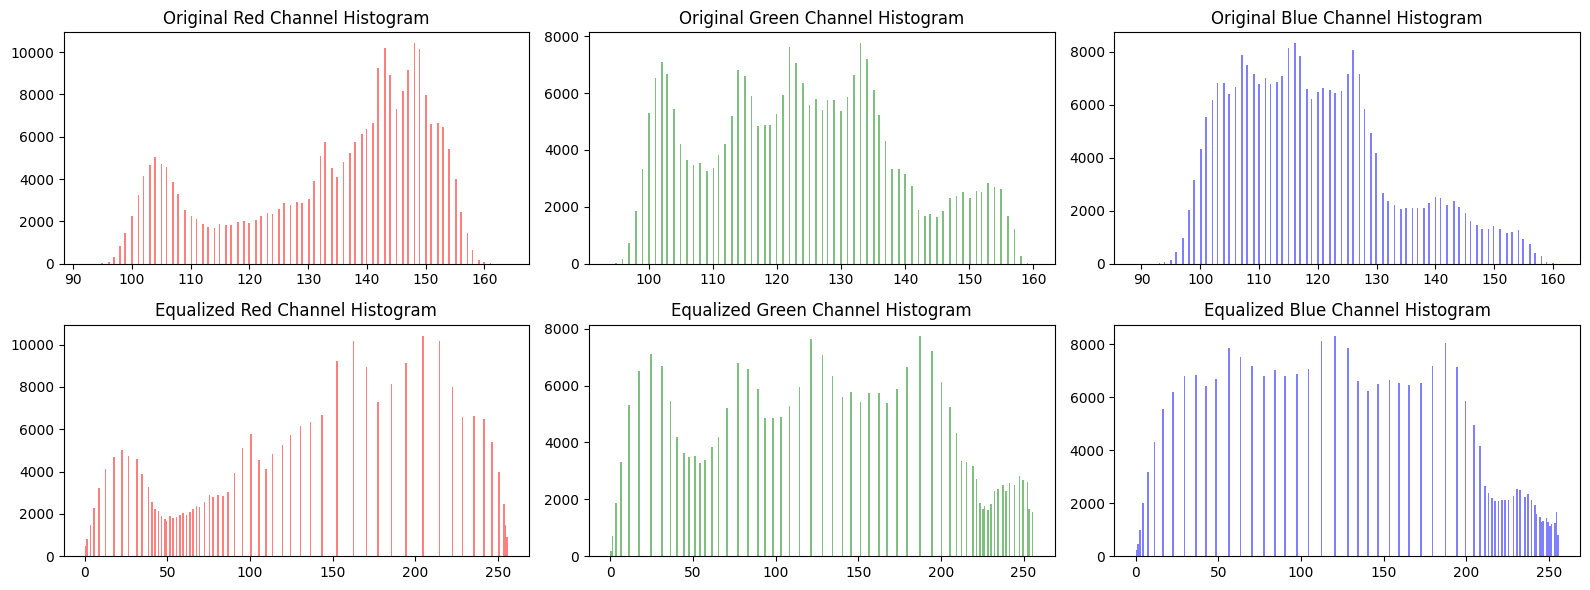

In [ ]:
image_np = np.array(image3)

red_channel = image_np[:, :, 0]
green_channel = image_np[:, :, 1]
blue_channel = image_np[:, :, 2]

red_eq = cv.equalizeHist(red_channel)
green_eq = cv.equalizeHist(green_channel)
blue_eq = cv.equalizeHist(blue_channel)

# Gabungkan yang telah di-equalize
equalized_image = cv.merge((red_eq, green_eq, blue_eq))

# Perbedaan gambar asli dan yang sudah di-equalize
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Histogram Equalized Image')

plt.show()

plt.figure(figsize=(16, 6))

fig, axs = plt.subplots(2, 3, figsize=(16, 6))

# Gambar asli
axs[0, 0].hist(red_channel.flatten(), bins=256,  color='red', alpha=0.5)
axs[0, 0].set_title('Original Red Channel Histogram')

axs[0, 1].hist(green_channel.flatten(), bins=256, color='green', alpha=0.5)
axs[0, 1].set_title('Original Green Channel Histogram')

axs[0, 2].hist(blue_channel.flatten(), bins=256, color='blue', alpha=0.5)
axs[0, 2].set_title('Original Blue Channel Histogram')

# Gambar yang telah di-equalize
axs[1, 0].hist(red_eq.flatten(), bins=256,range=(0,256), color='red', alpha=0.5)
axs[1, 0].set_title('Equalized Red Channel Histogram')

axs[1, 1].hist(green_eq.flatten(), bins=256, range=(0,256),color='green', alpha=0.5)
axs[1, 1].set_title('Equalized Green Channel Histogram')

axs[1, 2].hist(blue_eq.flatten(), bins=256,range=(0,256), color='blue', alpha=0.5)
axs[1, 2].set_title('Equalized Blue Channel Histogram')

plt.tight_layout()



Hasil yang akan ditampilkan sama

7. Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)

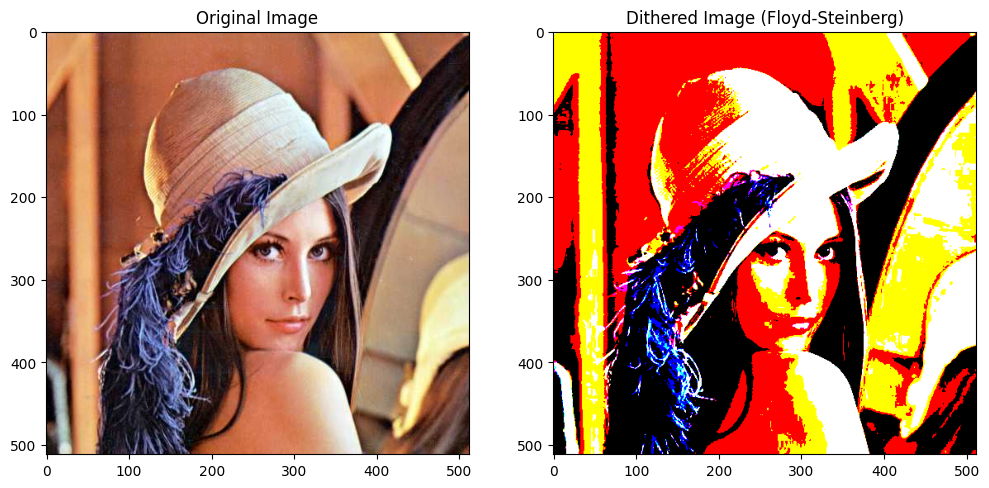

In [ ]:
image4 = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
image4 = cv.cvtColor(image4, cv.COLOR_BGR2RGB)

img_np = np.array(image4)
def warna_8(img,jarak_pixel):
    img_new = img.copy()
    img_red = img_new[:, :, 0]
    img_green = img_new[:, :, 1]
    img_blue = img_new[:, :, 2]
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            r_old = img_red[i, j]
            g_old = img_green[i, j]
            b_old = img_blue[i, j]
            # Hitung nilai piksel baru berdasarkan jarak
            r_new = np.round(jarak_pixel * r_old / 255.0) * (255 / jarak_pixel)
            g_new = np.round(jarak_pixel * g_old / 255.0) * (255 / jarak_pixel)
            b_new = np.round(jarak_pixel * b_old / 255.0) * (255 / jarak_pixel)

            img_red[i, j] = r_new
            img_green[i, j] = g_new
            img_blue[i, j] = b_new

    img_dithered = np.stack((img_red, img_green, img_blue), axis=2)
    return img_dithered

dithered_image = warna_8(img_np,1)
# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_image)
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()


8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berd

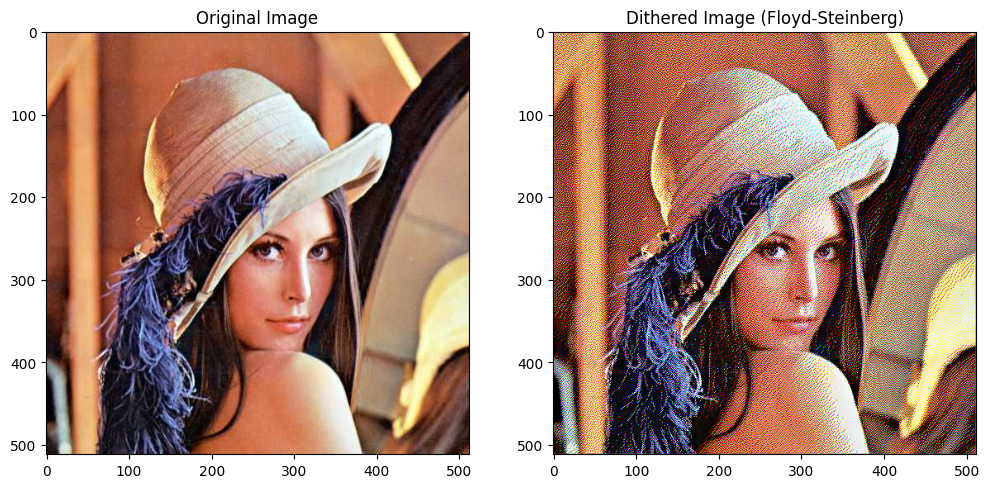

In [ ]:
image4 = cv.imread('/content/drive/MyDrive/PCVK/lena.jpg')
image4 = cv.cvtColor(image4, cv.COLOR_BGR2RGB)

img_np = np.array(image4)

def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value

def floyd_steinberg(img,jarak_pixel):
    img_new = img.copy()
    img_red = img_new[:, :, 0]
    img_green = img_new[:, :, 1]
    img_blue = img_new[:, :, 2]
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            r_old = img_red[i, j]
            g_old = img_green[i, j]
            b_old = img_blue[i, j]
            # Hitung nilai piksel baru berdasarkan jarak
            r_new = np.round(jarak_pixel * r_old / 255.0) * (255 / jarak_pixel)
            g_new = np.round(jarak_pixel * g_old / 255.0) * (255 / jarak_pixel)
            b_new = np.round(jarak_pixel * b_old / 255.0) * (255 / jarak_pixel)

            img_red[i, j] = r_new
            img_green[i, j] = g_new
            img_blue[i, j] = b_new
            # hitung error
            error_red = r_old - r_new
            error_green = g_old - g_new
            error_blue = b_old - b_new

            # Terapkan Floyd-Steinberg
            # Posisi R1
            img_red[i+1, j] = threshold(img_red[i+1, j] + error_red * 7/16)
            img_green[i+1, j] = threshold(img_green[i+1, j] + error_green * 7/16)
            img_blue[i+1, j] = threshold(img_blue[i+1, j] + error_blue * 7/16)
            #Posisi R2
            img_red[i-1, j+1] = threshold(img_red[i-1, j+1] + error_red * 3/16)
            img_green[i-1, j+1] = threshold(img_green[i-1, j+1] + error_green * 3/16)
            img_blue[i-1, j+1] = threshold(img_blue[i-1, j+1] + error_blue * 3/16)
            #Posisi R3
            img_red[i,j+1] = threshold(img_red[i,j+1] + error_red * 5/16)
            img_green[i,j+1] = threshold(img_green[i,j+1] + error_green * 5/16)
            img_blue[i,j+1] = threshold(img_blue[i,j+1] + error_blue * 5/16)
            #Posisi R4
            img_red[i+1,j+1] = threshold(img_red[i+1,j+1] + error_red * 1/16)
            img_green[i+1,j+1] = threshold(img_green[i+1,j+1] + error_green * 1/16)
            img_blue[i+1,j+1] = threshold(img_blue[i+1,j+1] + error_blue * 1/16)


    img_dithered = np.stack((img_red, img_green, img_blue), axis=2)
    return np.clip(img_dithered, 0, 255).astype(np.uint8)

dithered_image = floyd_steinberg(img_np,1)

# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_np)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_image)
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()








9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

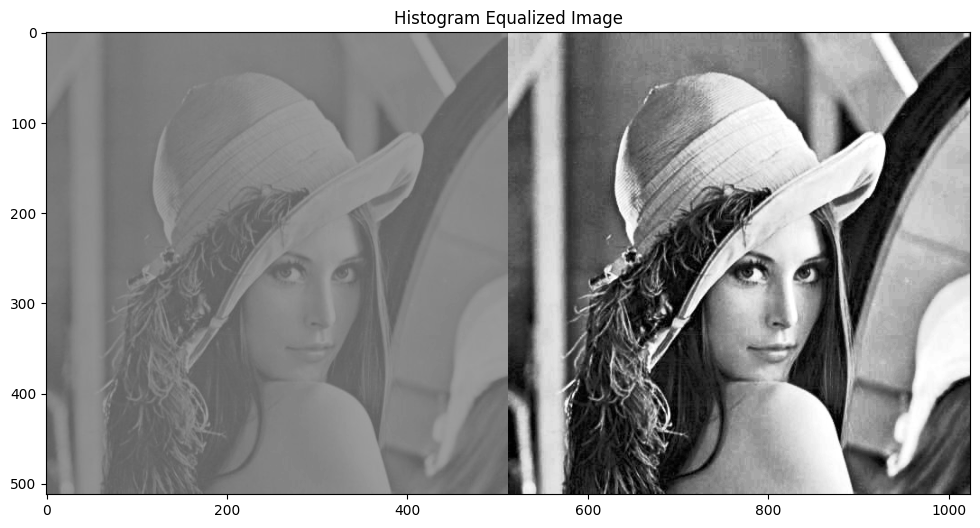

<Figure size 1600x600 with 0 Axes>

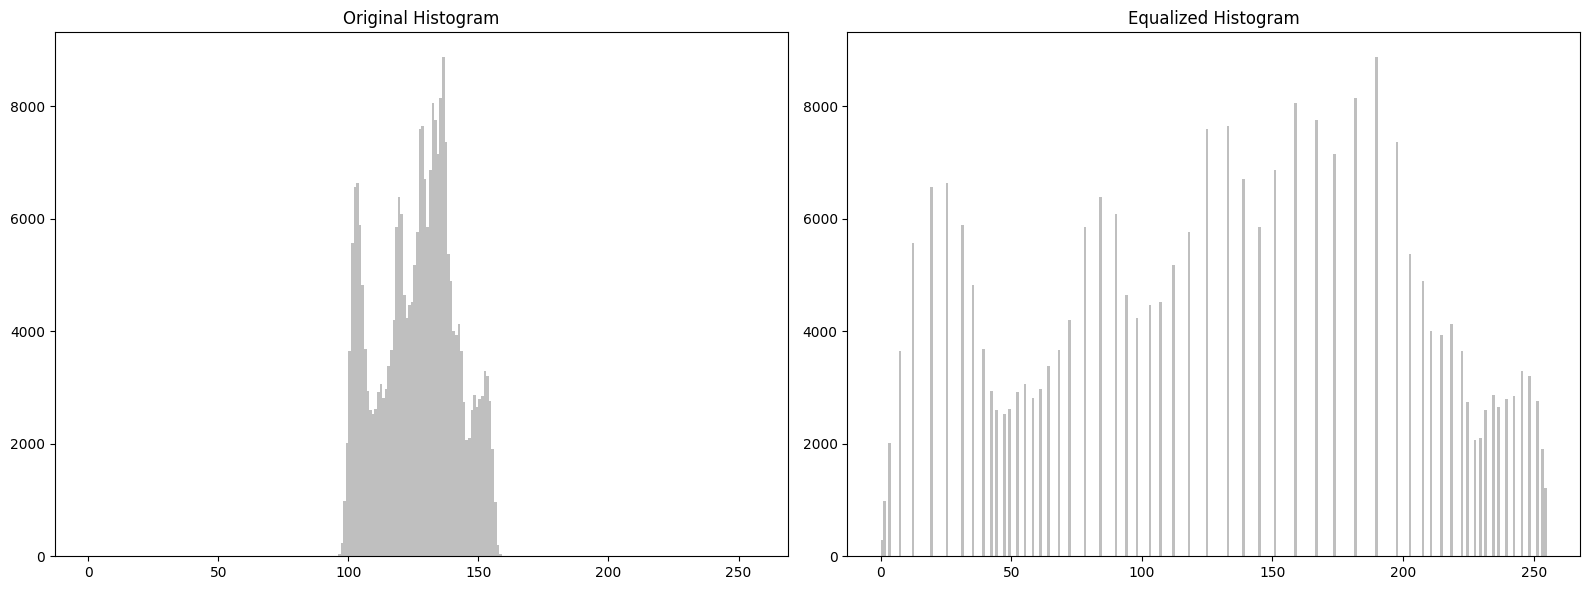

In [ ]:
img_gray = cv.imread('/content/drive/MyDrive/PCVK/lena_lc.jpg',cv.IMREAD_GRAYSCALE)
img_eq = cv.equalizeHist(img_gray)
res = np.hstack((img_gray,img_eq))
# Perbedaan gambar asli dan yang sudah di-equalize
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.imshow(res,cmap='gray')
plt.title('Histogram Equalized Image')

plt.show()

plt.figure(figsize=(16, 6))
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
# Histogram gambar asli
axs[0].hist(img_gray.flatten(), bins=256,range=(0,256), color='gray', alpha=0.5)
axs[0].set_title('Original Histogram')

# Histogram gambar yang sudah di-equalize
axs[1].hist(img_eq.flatten(), bins=256, color='gray', alpha=0.5)
axs[1].set_title('Equalized Histogram')

plt.tight_layout()
plt.show()

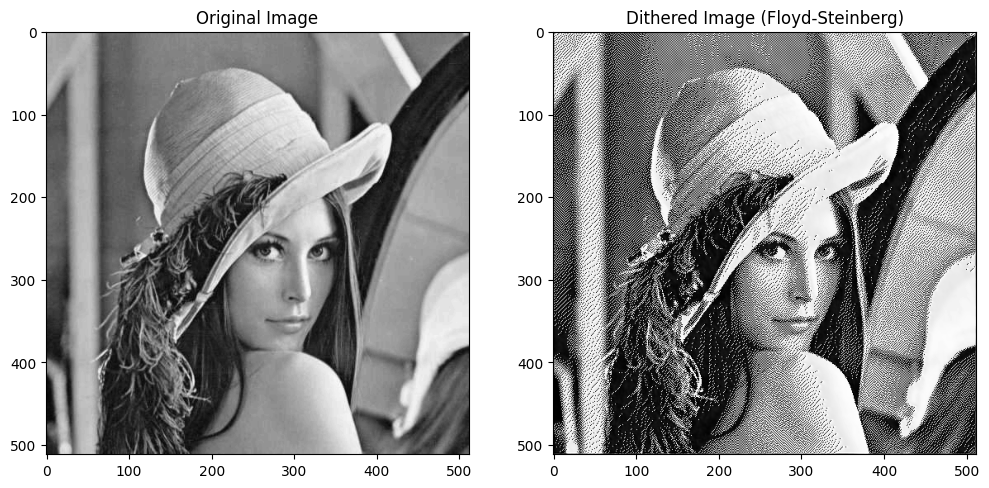

In [ ]:
def threshold(value):
    if value > 255:
        return 255
    elif value < 0:
        return 0
    else:
        return value


def floyd_steinberg(img,jarak_pixel):
    img_gray = img.copy()
    for i in range(img.shape[0]-1):
        for j in range(img.shape[1]-1):
            img_old = img_gray[i,j]
            # Hitung nilai piksel baru berdasarkan jarak
            img_new = np.round(jarak_pixel * img_old / 255.0) * (255 / jarak_pixel)

            img_gray[i, j] = img_new
            # hitung error
            error = img_old - img_new
            # Terapkan Floyd-Steinberg
            # Posisi R1
            img_gray[i+1, j] = threshold(img_gray[i+1, j] + error * 7/16)
            #Posisi R2
            img_gray[i-1, j+1] = threshold(img_gray[i-1, j+1] + error * 3/16)
            #Posisi R3
            img_gray[i,j+1] = threshold(img_gray[i,j+1] + error * 5/16)
            #Posisi R4
            img_gray[i+1,j+1] = threshold(img_gray[i+1,j+1] + error * 1/16)

    return np.clip(img_gray, 0, 255).astype(np.uint8)

dithered_image = floyd_steinberg(img_eq,1)
# Tampilkan gambar asli dan hasil dithering
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_gray,cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_image,cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')

plt.show()